In [34]:
import os
import re
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import shapely
from shapely import Polygon, Point, STRtree
from shapely.wkt import dumps, loads

In [66]:
directory = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2203'

In [67]:
region_mask = tifffile.imread(os.path.join(directory, 'inputs', 'ductal_mask.tif'))


In [68]:
region_to_geoms = json.load(open(os.path.join(directory, 'outputs', 'grid_polygons.json')))
region_to_masks = np.load(os.path.join(directory, 'outputs', 'regions.npy'), allow_pickle=True)[()]
region_to_grid = np.load(os.path.join(directory, 'outputs', 'grid_regions.npy'), allow_pickle=True)[()]

metric_df = pd.read_csv(os.path.join(directory, 'outputs', 'region_metrics.txt'), sep='\t', index_col=0)
region_to_bbox = {region_id: (r1, c1, r2, c2)
                  for region_id, r1, c1, r2, c2 in zip(metric_df.index, metric_df['boundary_bbox-0'], metric_df['boundary_bbox-1'], metric_df['boundary_bbox-2'], metric_df['boundary_bbox-3'])}


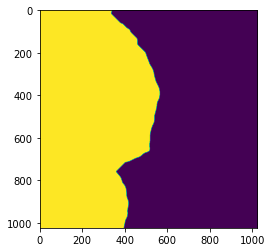

In [69]:
plt.imshow(region_mask)

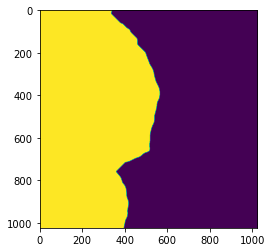

In [70]:
plt.imshow(region_to_masks['region']['mask'])

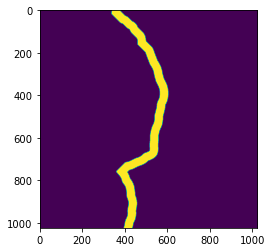

In [71]:
plt.imshow(region_to_masks['myoepi']['mask'])

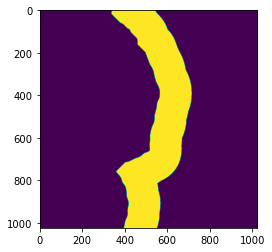

In [72]:
plt.imshow(region_to_masks['boundary']['mask'])

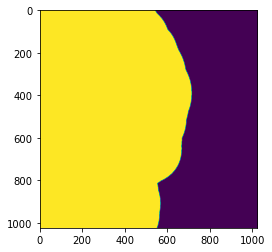

In [73]:
plt.imshow(region_to_masks['expanded']['mask'])

In [74]:
region_id = 1

In [75]:
region_to_grid[region_id]

{'grid_binary_positive_regions': {'SMA': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
  'combined': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)},
 'grid_labeled_regions_filtered': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 'grid_labeled_regions_unfiltered': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0

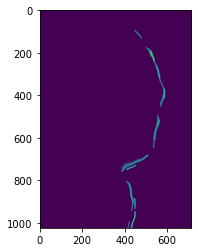

In [76]:
plt.imshow(region_to_grid[region_id]['grid_binary_positive_regions']['SMA'])

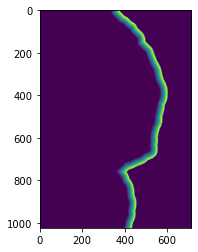

In [77]:
plt.imshow(region_to_grid[region_id]['grid_labeled_regions_filtered'])

In [78]:
d = region_to_geoms[str(region_id)]['polygons_unfiltered']
d.keys()

dict_keys(['polys', 'group_lines', 'rings'])

In [79]:
polys = loads(d['polys'])
rings = loads(d['rings'])

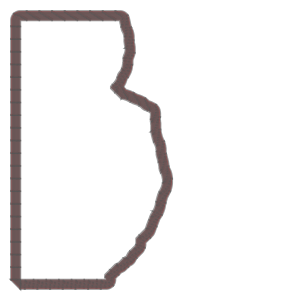

In [80]:
shapely.GeometryCollection(list(polys))

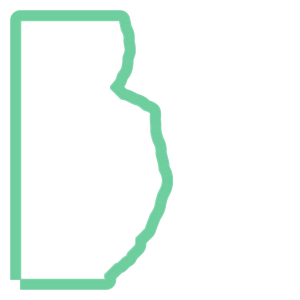

In [81]:
shapely.GeometryCollection(list(rings))

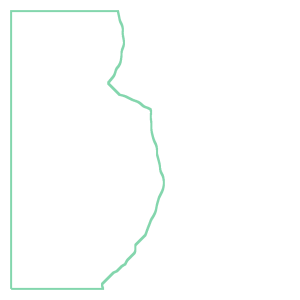

In [59]:
shapely.GeometryCollection(list(rings)[0])

In [63]:
list(rings)[0].xy

(array('d', [0.0, 0.0, 394.0, 394.0, 395.0, 395.0, 396.0, 396.0, 397.0, 397.0, 398.0, 398.0, 399.0, 399.0, 400.0, 400.0, 401.0, 401.0, 402.0, 402.0, 403.0, 403.0, 404.0, 404.0, 405.0, 405.0, 406.0, 406.0, 407.0, 407.0, 408.0, 408.0, 409.0, 409.0, 410.0, 410.0, 411.0, 411.0, 412.0, 412.0, 411.0, 411.0, 412.0, 412.0, 413.0, 413.0, 414.0, 414.0, 415.0, 415.0, 416.0, 416.0, 415.0, 415.0, 414.0, 414.0, 413.0, 413.0, 412.0, 412.0, 411.0, 411.0, 410.0, 410.0, 409.0, 409.0, 408.0, 408.0, 407.0, 407.0, 406.0, 406.0, 405.0, 405.0, 404.0, 404.0, 403.0, 403.0, 402.0, 402.0, 401.0, 401.0, 400.0, 400.0, 399.0, 399.0, 398.0, 398.0, 397.0, 397.0, 396.0, 396.0, 395.0, 395.0, 394.0, 394.0, 393.0, 393.0, 392.0, 392.0, 391.0, 391.0, 390.0, 390.0, 389.0, 389.0, 388.0, 388.0, 387.0, 387.0, 386.0, 386.0, 385.0, 385.0, 384.0, 384.0, 383.0, 383.0, 382.0, 382.0, 381.0, 381.0, 380.0, 380.0, 379.0, 379.0, 378.0, 378.0, 377.0, 377.0, 376.0, 376.0, 375.0, 375.0, 374.0, 374.0, 373.0, 373.0, 372.0, 372.0, 371.0, 371.

In [65]:
rings[8].xy

(array('d', [32.0, 32.0, 367.28216968, 367.61487103, 368.24830413, 368.61487103, 369.37790926, 370.20655021, 370.37790926, 371.20655021, 371.37790926, 372.43585496, 373.77851954, 374.03489187, 374.77851954, 375.03489187, 375.77851954, 376.03489187, 376.77851954, 377.03489187, 377.35052052, 377.37790926, 378.43585496, 378.8180112, 379.10880553, 379.15408875, 379.50467366, 379.15408875, 379.0, 379.0, 379.15408875, 379.61487103, 380.0, 380.0, 380.15408875, 380.61487103, 381.24830413, 381.61487103, 382.24830413, 382.61487103, 383.04769295, 383.15408875, 383.61487103, 383.80451714, 383.61487103, 383.24830413, 383.20655021, 382.37790926, 382.20655021, 381.37790926, 381.35052052, 380.43585496, 379.37790926, 379.20655021, 378.37790926, 378.20655021, 377.37790926, 376.61487103, 376.15408875, 376.10880553, 375.61487103, 375.15408875, 375.0, 375.0, 374.61487103, 374.15408875, 374.0, 374.0, 373.61487103, 373.15408875, 373.10880553, 372.61487103, 372.24830413, 372.20655021, 371.37790926, 371.350520

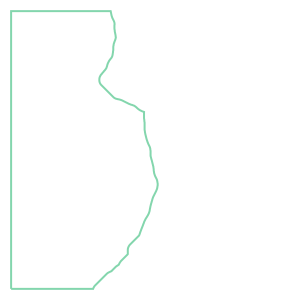

In [62]:
rings[6]

In [38]:
img = np.load('/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/region_mask.npy')
img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int16)

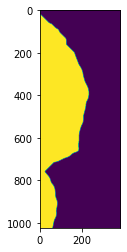

In [39]:
plt.imshow(img)

In [40]:
from mip.region_analysis import mask_to_polygon
ring = mask_to_polygon(img).exterior

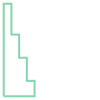

In [41]:
ring